In [5]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
#pd.get_option("display.max_rows")
#pd.reset_option("display.max_rows")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
%matplotlib inline

In [6]:
os.chdir(' ') #set proper directory depending where you put that project
#data - data for 2019/2020
#data05 - data for 2017/2018
#data1 - data for 2018/19
#data15 - data for 2020/21
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
466,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,54.5,-13.3,-0.35,22369,0.0,0.0,0.0,201920#,NaN,NaN
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,57.8,-20.5,-0.54,56885,0.0,0.0,0.0,201718#,NaN,574.0
4691,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,61.0,-11.9,-0.31,58336,0.0,0.0,0.0,201819#,542.0,NaN
2576,582.0,Aaron Cresswell,eng ENG,DF,West Ham,29.0,1989.0,6000000.0,170.0,Defender - Left-Back,...,61.1,-14.8,-0.39,44155,0.0,0.0,NaN,201920#,NaN,NaN
5688,NaN,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,1500000.0,183.0,midfield - Attacking Midfield,...,52.7,-15.7,-0.46,50656,0.0,0.0,0.0,201718#,NaN,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [7]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])
data1=pd.get_dummies(data1,columns=['foot'])
#deleting potential outliers that actually contribute nothing
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,1,0,0,0,0,0,1,0,0,1
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,1,0,0,0,0,0,1,0,0,1
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,1,0,0,0,0,0,1,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,1,0,0,0,0,0,1,0,1,0
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7095,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,26.0,1990.0,7000000.0,188.0,midfield - Defensive Midfield,...,0,0,0,0,1,0,0,0,0,1
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,0,0,0,0,1,0,0,0,1,0


In [8]:
#GOALKEEPERS
dataGK = data1[data1['position2']=='Goalkeeper']
dataGK=dataGK[dataGK['player']!='Emiliano Viviano'] #guy was causing some problems
dataGK

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
18,1871.0,Fernando Pacheco,es ESP,GK,AlavÄ‚Â©s,27.0,1992.0,14000000.0,186.0,Goalkeeper,...,1,0,0,0,0,0,1,0,1,0
87,1401.0,Bernd Leno,de GER,GK,Arsenal,27.0,1992.0,28000000.0,190.0,Goalkeeper,...,0,0,1,0,0,0,1,0,0,1
92,1568.0,Emiliano MartÄ‚Â­nez,ar ARG,GK,Arsenal,26.0,1992.0,2000000.0,195.0,Goalkeeper,...,0,0,1,0,0,0,1,0,0,1
116,1067.0,Tom Heaton,eng ENG,GK,Aston Villa,33.0,1986.0,4000000.0,188.0,Goalkeeper,...,0,0,1,0,0,0,1,0,0,1
127,1812.0,Ä‚Â�rjan Nyland,no NOR,GK,Aston Villa,28.0,1990.0,1200000.0,192.0,Goalkeeper,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,NaN,Orestis Karnezis,gr GRE,GK,Watford,32.0,1985.0,3000000.0,190.0,Goalkeeper,...,0,0,1,0,1,0,0,0,0,1
7045,NaN,Ben Foster,eng ENG,GK,West Brom,34.0,1983.0,3000000.0,193.0,Goalkeeper,...,0,0,1,0,1,0,0,0,1,0
7060,NaN,AdriĂˇn,es ESP,GK,West Ham,30.0,1987.0,5000000.0,190.0,Goalkeeper,...,0,0,1,0,1,0,0,0,0,1
7071,NaN,Joe Hart,eng ENG,GK,West Ham,30.0,1987.0,10000000.0,196.0,Goalkeeper,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
#was originally used for correlations calculations (visible in appendix)

#dataGK['age']=dataGK['age']*dataGK['age']
#dataGK_cor = dataGK.corr()
#show=pd.Series(dataGK_cor['value'])
#pd.set_option('display.max_rows', None)
#show.sort_values(ascending=False)

In [10]:
#for my liking
def ln(x):
    return np.log(x)

#dataGK['test']=dataGK['W']/dataGK['MP']
#Creating a linear regression
trainGK, testGK = train_test_split(dataGK, train_size=0.8)
modelGK=smf.ols('ln(value)~age+CL+wins_gk+draws_gk+passes_pct_launched_gk+psnpxg_per_shot_on_target_against+'
                  '+isPremierLeague+isLigue1+clean_sheetsm',data=dataGK)
modelGK1=smf.ols('value~wins_gk+clean_sheets+Pts+W+GDiff+clean_sheets_pct+CL+xGDiff+GF+xG+passes_ground+passes_completed_medium+passes_medium+games+games_starts+minutes_90s+minutes+games_gk+games_starts_gk+minutes_90s_gk+minutes_gk+passes_throws_gk+passes_other_body+passes_completed+passes_received+passes_live+pass_targets+carries+touches_live_ball+passes_pct_long+touches_def_pen_area+passes_completed_short+passes_gk+passes_pressure+passes_pct+def_actions_outside_pen_area_gk+passes_total_distance+psxg_net_gk+touches_def_3rd+passes_short+passes+touches+ball_recoveries+through_balls+dribble_tackles_pct+psxg_net_per90_gk+passes_pct_launched_gk+save_pct+passes_low+xa_net+passes_progressive_distance+WinCL+carry_distance+gca_passes_dead+errors+passes_switches+passes_completed_long+crosses_gk+passes_intercepted+crosses_stopped_gk+dribbles_completed_pct+passes_left_foot+carry_progressive_distance+isPremierLeague+MP+avg_distance_def_actions_gk+saves+draws_gk+assists+goal_kicks+gca+foot_left+isLaLiga+passes_right_foot+shots_on_target_against+passes_pct_short+aerials_won_pct+passes_dead+assists_per90+gca_per90+passes_completed_launched_gk+passes_long+sca_passes_dead+def_actions_outside_pen_area_per90_gk+passes_pct_medium+crosses_stopped_pct_gk+passes_oob+own_goals_against_gk+gca_passes_live+pens_conceded+shots_on_target_pct+throw_ins+psxg_gk+pens_missed_gk+goals_assists_pens_per90+passes_received_pct+height+pens_allowed+goals_assists_per90+passes_launched_gk+npxg_net+pens_att_gk+cards_red+sca+xg_net+sca_passes_live+passes_high+fouled+free_kick_goals_against_gk+cards_yellow+corner_kicks_in+xa+passes_offsides+pens_saved+dribbles_completed+dribble_tackles+assisted_shots+players_dribbled_past+npxg_per_shot+xa_per90+passes_into_penalty_area+pressure_regain_pct+tackles_def_3rd+passes_free_kicks+miscontrols+dribbles+dribbles_vs+passes_head+isSerieA+clearances+corner_kick_goals_against_gk+dribbled_past+corner_kicks+shots_on_target_per90+tackles+goals_against_gk+pressures_def_3rd+tackles_won+dispossessed+tackles_mid_3rd+fouls+shots_total_per90+progressive_passes+offsides+npxg_xa_per90+xg_xa_per90+goals_pens_per90+passes_blocked+touches_mid_3rd+aerials_won+shots_on_target+sca_dribbles+gca_shots+pens_att+pens_made+pens_won+nutmegs+goals_per90+crosses+pressures+blocked_shots+pressure_regains+interceptions+goals_per_shot+shots_total+pressures_mid_3rd+shots_free_kicks+touches_att_pen_area+goals+sca_fouled+pressures_att_3rd+aerials_lost+touches_att_3rd+tackles_att_3rd+xg+goals_per_shot_on_target+own_goals+npxg+sca_shots+npxg_per90+xg_per90+blocks+blocked_passes+sca_per90+crosses_into_penalty_area+passes_into_final_third+D+psnpxg_per_shot_on_target_against+goal_kick_length_avg+foot_right+isBundesliga+isLigue1+passes_length_avg_gk+pct_goal_kicks_launched+losses_gk+pct_passes_launched_gk+age+goals_against_per90_gk+xGA+GA+L+LgRk+gca_dribbles+gca_fouled+gca_og_for+corner_kicks_out+corner_kicks_straight+foot_both+cards_yellow_red+blocked_shots_saves',data=dataGK)    

resultsGK=modelGK.fit()
resultsGK1=modelGK1.fit()
resultsGK_params=resultsGK.params
resultsGK1_params=resultsGK1.params
#Creating a robust regression
modelGKrobust=sm.RLM(modelGK.endog,modelGK.exog,data=dataGK).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)

finalGK1 = sm.regression.linear_model.OLSResults(modelGK, 
                                              modelGKrobust.params, 
                                              modelGK.normalized_cov_params)
finalGK1.summary()
#print(finalGK1.summary())
#print('do not bother about it printing summary like for OLS - this is a robust regression as you can see from the code')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln(value)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     70.50
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           5.70e-65
Time:                        18:56:53   Log-Likelihood:                -213.05
No. Observations:                 273   AIC:                             446.1
Df Residuals:                     263   BIC:                             482.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            18.2627      0.322     56.664      0.000      17.628      18.897
age                                  -0.1200      0.009    -13.022      0.000      -0.138      -0.102
CL                                    0.2470      0.105      2.352      0.019       0.040       0.454
wins_gk                               0.0782      0.007     10.994      0.000       0.064       0.092
draws_gk                              0.0416      0.010      4.248      0.000       0.022       0.061
passes_pct_launched_gk                0.0126      0.005      2.508      0.013       0.003       0.023
psnpxg_per_shot_on_target_against    -3.7805      0.766     -4.935      0.000      -5.289      -2.272
isPremierLeague                       0.5528      0.085      6.489      0.000       0.385       0.721
isLigue1                             -0.4227      0.091     -4.620      0.000      -0.603      -0.243
clean_sheetsm                        63.7429     20.026      3.183      0.002      24.312     103.174
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                1.161
Skew:                           0.133   Prob(JB):                        0.560
Kurtosis:                       2.822   Cond. No.                     3.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#VIF 
vif = pd.DataFrame()
vif["features"] = modelGK.exog_names
vif["VIF Factor"] = [variance_inflation_factor(finalGK1.model.exog, i) for i in range(finalGK1.model.exog.shape[1])]
vif

,features,VIF Factor
0,Intercept,97.971961
1,age,1.063758
2,CL,1.739420
3,wins_gk,1.947209
4,draws_gk,1.272690
5,passes_pct_launched_gk,1.552016
6,psnpxg_per_shot_on_target_against,1.329117
7,isPremierLeague,1.254784
8,isLigue1,1.124925
9,clean_sheetsm,1.177900


In [13]:
#testing
#Breusch-Pagan
bptestGK=sm.stats.diagnostic.het_breuschpagan(finalGK1.resid, finalGK1.model.exog)
bptestGK

(12.154844651020422,
 0.2047200266073482,
 1.3616951060237394,
 0.20572051324225674)

In [15]:
#Chowtest
trainGK1=dataGK[dataGK['Season_201819#']==0]
trainGK2=dataGK[dataGK['Season_201819#']==1]
JGK = len(resultsGK.params)-1 #number of coefficients
N1GK = trainGK1.shape[0]
N2GK = trainGK2.shape[0]
RSSdGK=resultsGK.ssr
resultsGKridge1=smf.ols('ln(value)~age+CL+wins_gk+draws_gk+passes_pct_launched_gk+psnpxg_per_shot_on_target_against+'
                  '+isPremierLeague+isLigue1+clean_sheetsm',data=trainGK1).fit()
RSSbGK=resultsGKridge1.ssr
kGK = len(resultsGKridge1.params)-1
resultsGKridge2=smf.ols('ln(value)~age+CL+wins_gk+draws_gk+passes_pct_launched_gk+psnpxg_per_shot_on_target_against+'
                  '+isPremierLeague+isLigue1+clean_sheetsm',data=trainGK2).fit()
RSSnbGK = resultsGKridge2.ssr
ChowGK=((RSSdGK-(RSSbGK+RSSnbGK))/JGK)/((RSSbGK+RSSnbGK)/(N1GK+N2GK-2*kGK))
pGK=sp.stats.f.cdf(ChowGK, JGK, N1GK+N2GK-2*kGK)
print(ChowGK,pGK,JGK)

0.37745486769861747 0.05474278866559145 9


In [18]:
predictionsGK=finalGK1.predict(dataGK)
dataGK['predsOLS']=np.exp(predictionsGK)

In [20]:
#cross validation
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
        #self.results_ = self.model_.fit_regularized(L1_wt=1, alpha=0.1,start_params=resultsGK_params)
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
linearcval=cross_val_score(SMWrapper(sm.RLM), modelGK.exog, modelGK.endog, scoring='neg_root_mean_squared_error')
pd.DataFrame(pd.Series(np.transpose(linearcval)))
#robustcval=cross_val_score(SMWrapper(sm.RLM), modelGK.exog, modelGK.endog, scoring='neg_mean_absolute_error')
#pd.DataFrame(pd.concat([pd.Series(np.transpose(linearcval)),pd.Series(np.transpose(robustcval))],axis=1))

,0
0,-0.611185
1,-0.544143
2,-0.506758
3,-0.460503
4,-0.588065


In [27]:
data=dataGK[dataGK['Season_201920#']==1]
#data1=data.sort_values('clean_sheetsm',ascending=False)[0:10]['value']
#data2=data.sort_values('psnpxg_per_shot_on_target_against',ascending=True)[0:10]['value']
#data3=data.sort_values('passes_pct_launched_gk',ascending=False)[0:10]['value']
data=data[['player','value','clean_sheetsm','psnpxg_per_shot_on_target_against','passes_pct_launched_gk']]
data1=data.sort_values('value',ascending=False)[0:10]
pd.DataFrame(data.mean()).transpose()

,value,clean_sheetsm,psnpxg_per_shot_on_target_against,passes_pct_launched_gk
0,1.257129e+07,0.002929,0.28396,40.319802


Text(0.825, 0.85, '-0.17')

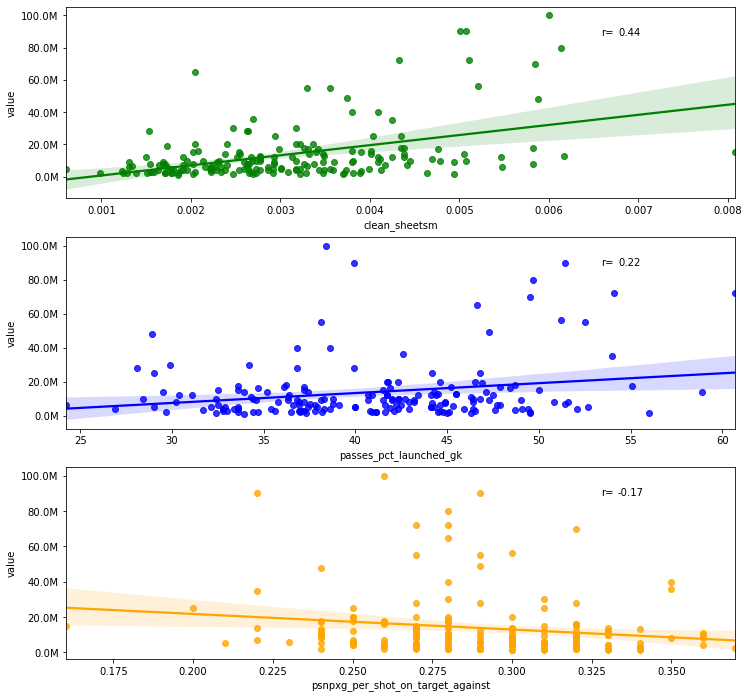

In [28]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = mpl.ticker.FuncFormatter(millions)

dataGK=dataGK[dataGK['clean_sheetsm']>0]
dataGK=dataGK[dataGK['passes_pct_launched_gk']>0]
dataGK=dataGK[dataGK['psnpxg_per_shot_on_target_against']>0]
corrcoef1=np.corrcoef(dataGK['value'],dataGK['clean_sheetsm'])
corrcoef2=np.corrcoef(dataGK['value'],dataGK['passes_pct_launched_gk'])
corrcoef3=np.corrcoef(dataGK['value'],dataGK['psnpxg_per_shot_on_target_against'])
corrcoef1=corrcoef1[0,1]
corrcoef2=corrcoef2[0,1]
corrcoef3=corrcoef3[0,1]

fig, ax = plt.subplots(3, 1, figsize=(12, 12))
sns.regplot(ax=ax[0],x=dataGK['clean_sheetsm'],y=dataGK['value'],data=dataGK,color='g')
sns.regplot(ax=ax[1],x=dataGK['passes_pct_launched_gk'],y=dataGK['value'],data=dataGK,color='blue')
sns.regplot(ax=ax[2],x=dataGK['psnpxg_per_shot_on_target_against'],y=dataGK['value'],data=dataGK,color='orange')

ax[0].yaxis.set_major_formatter(formatter)
ax[0].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[0].annotate("{:.2f}".format(corrcoef1),xy=(0.825,0.85), xycoords="axes fraction")

ax[1].yaxis.set_major_formatter(formatter)
ax[1].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[1].annotate("{:.2f}".format(corrcoef2),xy=(0.825,0.85), xycoords="axes fraction")

ax[2].yaxis.set_major_formatter(formatter)
ax[2].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[2].annotate("{:.2f}".format(corrcoef3),xy=(0.825,0.85), xycoords="axes fraction")